In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('nature-data.csv', encoding="shift-jis", skiprows=11)
df.columns
df.drop(df.columns[0: 3], axis=1, inplace=True)
df.drop(df.columns[1], axis=1, inplace=True)
df

,地域,B1101_総面積（北方地域及び竹島を除く）【ｈａ】,B1102_総面積（北方地域及び竹島を含む）【ｈａ】,B1103_可住地面積【ｈａ】,B1104_主要湖沼面積【ｈａ】,B1105_林野面積【ｈａ】,B1106_森林面積【ｈａ】,B1107_森林以外の草生地面積【ｈａ】,B1201_評価総地積（課税対象土地）【ｍ2】,B120103_評価総地積（宅地）【ｍ2】
0,北海道 札幌市,"112,126","112,126","44,036",0,"68,228","67,690",538,"333,758,282","137,395,497"
1,北海道 函館市,"67,783","67,783","12,838",0,"55,453","52,925","2,528","212,257,638","31,328,638"
2,北海道 小樽市,"24,383","24,383","8,029",0,"16,374","15,824",550,"87,770,522","16,840,634"
3,北海道 旭川市,"74,766","74,766","35,022",0,"39,572","39,419",153,"330,636,443","52,587,973"
4,北海道 室蘭市,"8,088","8,088","4,327",0,"3,761","2,508","1,253","43,866,647","18,703,042"
...,...,...,...,...,...,...,...,...,...,...
1736,沖縄県 久米島町,"6,365","6,365","3,997",0,"2,374","2,374",0,"26,015,973","1,733,080"
1737,沖縄県 八重瀬町,"2,696","2,696","2,499",0,200,200,0,"20,750,021","3,060,738"
1738,沖縄県 多良間村,"2,199","2,199","1,588",0,611,491,120,"11,393,983","291,846"
1739,沖縄県 竹富町,"33,439","33,439","5,653",0,"27,786","25,699","2,087","53,183,876","1,645,571"


In [3]:
df['B1106_森林面積【ｈａ】'].max()

'972'

In [4]:
print('Are there missing value?', df.isnull().values.any())
print('How many?', df.isnull().values.sum())

Are there missing value? False
How many? 0


In [5]:
df['B1106_森林面積【ｈａ】'] = df['B1106_森林面積【ｈａ】'].str.replace(',', '').astype(float)
df['B1103_可住地面積【ｈａ】'] = df['B1103_可住地面積【ｈａ】'].str.replace(',', '').astype(float)

In [6]:
X = df.iloc[:, [3, 6]].values
print(X)

[[44036. 67690.]
 [12838. 52925.]
 [ 8029. 15824.]
 ...
 [ 1588.   491.]
 [ 5653. 25699.]
 [ 1219.  1225.]]


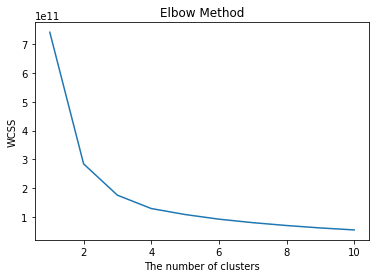

In [7]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('The number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++')
y_kmeans = kmeans.fit(X)

In [9]:
predictions = y_kmeans.labels_
df['Clusters'] = predictions
df

,地域,B1101_総面積（北方地域及び竹島を除く）【ｈａ】,B1102_総面積（北方地域及び竹島を含む）【ｈａ】,B1103_可住地面積【ｈａ】,B1104_主要湖沼面積【ｈａ】,B1105_林野面積【ｈａ】,B1106_森林面積【ｈａ】,B1107_森林以外の草生地面積【ｈａ】,B1201_評価総地積（課税対象土地）【ｍ2】,B120103_評価総地積（宅地）【ｍ2】,Clusters
0,北海道 札幌市,"112,126","112,126",44036.0,0,"68,228",67690.0,538,"333,758,282","137,395,497",2
1,北海道 函館市,"67,783","67,783",12838.0,0,"55,453",52925.0,"2,528","212,257,638","31,328,638",2
2,北海道 小樽市,"24,383","24,383",8029.0,0,"16,374",15824.0,550,"87,770,522","16,840,634",1
3,北海道 旭川市,"74,766","74,766",35022.0,0,"39,572",39419.0,153,"330,636,443","52,587,973",0
4,北海道 室蘭市,"8,088","8,088",4327.0,0,"3,761",2508.0,"1,253","43,866,647","18,703,042",3
...,...,...,...,...,...,...,...,...,...,...,...
1736,沖縄県 久米島町,"6,365","6,365",3997.0,0,"2,374",2374.0,0,"26,015,973","1,733,080",3
1737,沖縄県 八重瀬町,"2,696","2,696",2499.0,0,200,200.0,0,"20,750,021","3,060,738",3
1738,沖縄県 多良間村,"2,199","2,199",1588.0,0,611,491.0,120,"11,393,983","291,846",3
1739,沖縄県 竹富町,"33,439","33,439",5653.0,0,"27,786",25699.0,"2,087","53,183,876","1,645,571",1


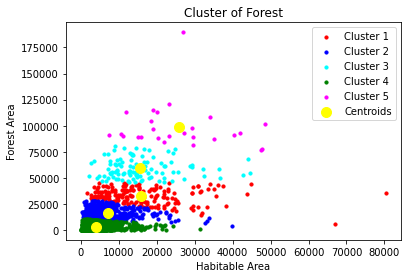

In [10]:
plt.scatter(X[y_kmeans.labels_ == 0, 0], X[y_kmeans.labels_ == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans.labels_ == 1, 0], X[y_kmeans.labels_ == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans.labels_ == 2, 0], X[y_kmeans.labels_ == 2, 1], s = 10, c = 'cyan', label = 'Cluster 3')
plt.scatter(X[y_kmeans.labels_ == 3, 0], X[y_kmeans.labels_ == 3, 1], s = 10, c = 'green', label = 'Cluster 4')
plt.scatter(X[y_kmeans.labels_ == 4, 0], X[y_kmeans.labels_ == 4, 1], s = 10, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel('Habitable Area')
plt.ylabel('Forest Area')
plt.title('Cluster of Forest')
plt.legend()
plt.show()

In [11]:
clusters = df['Clusters'].to_list()
print(clusters[:10]) 
municipalities = df['地域'].to_list()
print(municipalities[:10])
forest_area = df['B1106_森林面積【ｈａ】'].to_list()
print(forest_area[:10])
habitable_area = df['B1103_可住地面積【ｈａ】'].to_list()
print(habitable_area[:10])

[2, 2, 1, 0, 3, 4, 0, 4, 2, 0]
['北海道 札幌市', '北海道 函館市', '北海道 小樽市', '北海道 旭川市', '北海道 室蘭市', '北海道 釧路市', '北海道 帯広市', '北海道 北見市', '北海道 夕張市', '北海道 岩見沢市']
[67690.0, 52925.0, 15824.0, 39419.0, 2508.0, 97770.0, 23173.0, 93198.0, 65127.0, 16206.0]
[44036.0, 12838.0, 8029.0, 35022.0, 4327.0, 29318.0, 38220.0, 42064.0, 10806.0, 31922.0]


In [18]:
y_kmeans.score(X)

-108596537241.47293

In [25]:
result_dict = {}
for i in range(len(municipalities)):
  result_dict[municipalities[i]] = [habitable_area[i], forest_area[i], clusters[i]]


In [27]:
# import joblib

# joblib.dump(result_dict, './clustering_result.joblib', compress=True)

['./clustering_result.joblib']